# iris 데이터를 이용한 KNN 분류 실습

붓꽃 데이터 셋

- 클래스 (class) : 출력될 수 있는 값 (붓꽃의 종류)

- 레이블 (label) : 특정 데이터 포인트에 대한 출력

붓꽃의 품종 분류

- iris setosa

- iris verslcolor

- iris virginica

In [1]:
# 데이터 가져오기
from sklearn.datasets import load_iris

iris_dataset = load_iris()
iris_dataset
type(iris_dataset)  # sklearn.utils.Bunch -> 파이썬의 딕셔너리와 유사한 키와 값으로 구성

iris_dataset.keys() # 'data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'

# print( iris_dataset['DESCR'] )  # 데이터셋 간략 설명

print( iris_dataset.target_names ) # 예측하려는 붓꽃 품종 이름 리스트

print( iris_dataset.feature_names) # 각 특성을 설명하는 문자열 리스트

print( iris_dataset.data.shape )   # 꽃잎의 길이와 폭, 꽃받침의 길이와 폭 값을 갖는 ndarray
                                   # 머신러닝에서 각 아이템은 샘플, 속성은 특성
print( iris_dataset.data[:5] )     # 처음 5개만 출력

print( iris_dataset.target.shape ) # 샘플 붓꽃의 품종을 담은 ndarray, 1차원 배열

print( iris_dataset.target )       # 붓꽃 종류 0~2 정수로 기록 (0은 setosa)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
# 데이터 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# iris data loading
df = sns.load_dataset('iris')

In [12]:
# 데이터 확인
df.head()

X = df.iloc[:, :4]
y = df.iloc[:, -1]

In [13]:
# 훈련 데이터와 테스트 데이터 준비
from sklearn.model_selection import train_test_split

# 2차원 배열(행렬)의 수학 표기방식 대문자 X
# 1차원 배열(벡터)의 수학 표기방식 소문자 y
# 데이터 섞음
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 75% : 25%
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

### 산점도 행렬

sns.pairplot()

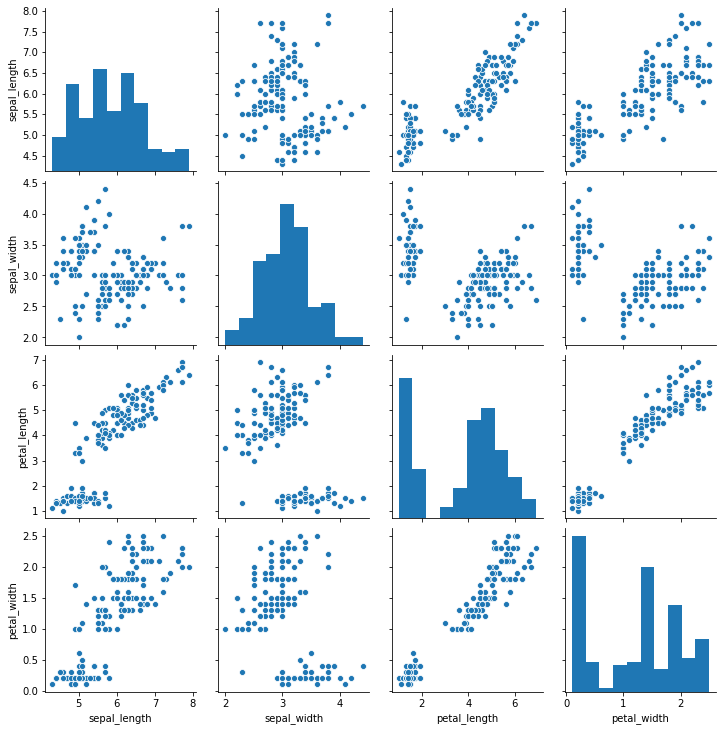

In [17]:
# 데이터 조사
# 산점도 행렬 : 3개 이상의 특성을 표현
# 4개의 특성을 갖는 붓꽃
# 대각원소 자리에 각 변수별 히스토그램
sns.pairplot(df, diag_kind='hist')
plt.show()

In [19]:
# Scatterplot matrix with different color by group and kde

# 각 변수별 커널밀도추정곡선
# 'species' 종(setosa, versicolor, virginica) 별로 색깔을 다르게 표시
# pastel, bright, deep, muted, colorblind, dark

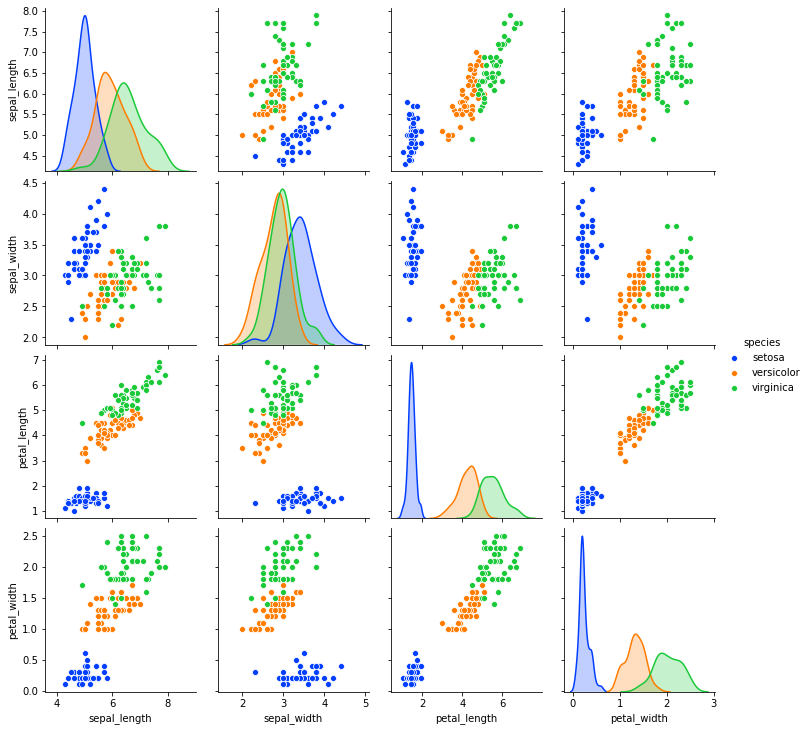

In [18]:
sns.pairplot(df, diag_kind='kde', hue='species', palette='bright')
plt.show()

In [22]:
# 머신러닝 모델
# k-최근접 이웃 알고리즘
# 훈련 데이터에서 새로운 데이터 포인트에 가장 가까운 'k개'의 이웃을 찾는다.
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [27]:
# 예측하기
X_new = np.array([[5, 2.9, 1, 0.2]])

pre = model.predict(X_new)
print(f"예측: {pre}")

예측: ['setosa']


In [35]:
# 모델 평가
# 테스트 세트 이용
from sklearn import metrics

y_pred = model.predict(X_test)

ac_score = metrics.accuracy_score(y_test, y_pred)
print(f"정답률: {round(ac_score, 3)}")

정답률: 0.974


### KNeighborsClassifier 분석

#### 결정경계([descision boundary](https://developers.google.com/machine-learning/glossary#%EA%B2%B0%EC%A0%95-%EA%B2%BD%EA%B3%84decision-boundary))

이웃의 수를 늘릴수록 결정경계는 더 부드러워진다.

이웃을 적게 사용하면 모델의 복잡도가 높아지고, 
많이 사용하면 복잡도는 낮아진다.

### 연습 문제

In [52]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

# 영화에 대한 3개의 특성
X_train = [
  [0.5, 0.2, 0.1],
  [0.9, 0.7, 0.3],
  [0.4, 0.5, 0.7]
]

# 영화에 대한 별점
y_train = [5.0, 6.8, 9.0]

# 테스트 데이터
X_test = [
  [0.2, 0.1, 0.7],
  [0.4, 0.7, 0.6],
  [0.5, 0.8, 0.1]
]

# 가중 평균을 적용
model = KNeighborsRegressor(n_neighbors=3, weights='distance')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)

[7.28143288 7.76451922 6.8457845 ]
